<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

##### Descargar y guardar los dataset de Kaggle

##### Importar paquetes para usar en la actividad

In [1]:
import numpy as np
import pandas as pd
import zipfile as zp
import os
import matplotlib.pyplot as plt
import seaborn as sns

##### Autenticacion con Kaggle API

In [2]:
os.environ['KAGGLE_USERNAME'] = "jmejiasb"
os.environ['KAGGLE_KEY'] = "782634d4517fd0263297f09bf847ecad"

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

##### Descargar zip de archivos con API de Kaggle
##### Para descargar usando el Kaggle API se debe usar el link del dataset (la url de kaggle despues de "www.kaggle.com/") y la ruta donde guardar el archivo zip


In [3]:
route = os.path.join("res")
api.dataset_download_files("heesoo37/120-years-of-olympic-history-athletes-and-results", path = route)
api.dataset_download_files("jayrav13/olympic-track-field-results", path = route)

##### Extraer archivos zip de los dataset en su respectiva carpeta

In [4]:
#120 years of olympic history: athletes and results
with zp.ZipFile("res/120-years-of-olympic-history-athletes-and-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","120_years_olympic_history")) 
    print('Done!')
    
#Olympic track field results
with zp.ZipFile("res/olympic-track-field-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","olympic-track-field-results")) 
    print('Done!')

Extracting all files...
Done!
Extracting all files...
Done!


##### Guardar csv en su respectivo DataFrame

In [5]:
#120 years of olympic history: athletes and result
olympic_history_route = os.path.join("res","120_years_olympic_history","athlete_events.csv")

olympic_history = pd.read_csv(olympic_history_route, engine="python", header=0)

olympic_history.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
163110,81896,Ernest Marie Eugne Adolphe Moreau de Melen,M,NaN,NaN,NaN,Univ. of Brussels,BEL,1900 Summer,1900,Summer,Paris,Football,Football Men's Football,Bronze
256128,128238,Per Johan Daniel Wallner,M,29.0,182.0,81.0,Sweden,SWE,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
39927,20534,Ihor Volodymyrovych Chervynskiy,M,18.0,180.0,73.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 400 metres Freestyle,NaN


In [6]:
#Track field results
olympic_track_field_route = os.path.join("res","olympic-track-field-results","results.csv")

#Al intentar leer el csv lanza error ya que algunos valores de la columna "Results" tienen una coma de mas (ie. ",+0.1") 
#y lo toma como una nueva columna

#olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0) #ParserError

In [7]:
#Para resolver este error se usa el parametro "usecols" para que solo tome en cuenta solo las primeras 8 columnas.
olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0, usecols=range(8))

olympic_track_field.sample(3)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
697,M,4X100M Relay Men,Antwerp,1920,G,NaN,USA,0:42.2
1760,W,1500M Women,Los Angeles,1984,S,Doina MELINTE,ROU,4:03.76
746,M,4X400M Relay Men,Montreal,1976,G,NaN,USA,2:58.65


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

##### A partir de 1992 los juegos olimpicos de invierno se hacen con dos años de diferencia. 
##### Para que todo el grafico quede en intervalos de 4 años, se hace una list comprehension para cambiar estos años de juegos de invierno a los años de los juegos de verano

In [8]:
olympic_history["Year"] = [x+2 if x % 4 != 0 else x for x in olympic_history["Year"]]

olympic_history.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
234866,117787,Matteo Tagliariol,M,25.0,188.0,78.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Team",Bronze
76127,38632,Luis Rigiberto Garca Jimnez,M,34.0,169.0,67.0,Venezuela,VEN,1968 Summer,1968,Summer,Mexico City,Fencing,"Fencing Men's Foil, Team",NaN
91089,46162,Dionna Marie Harris,F,28.0,160.0,NaN,United States,USA,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Gold


- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

##### Filtrar el numero de deportes y el año en que se hizo, debido a que cada deporte tiene varios eventos se eliminan los duplicados

In [9]:
sports_per_year = olympic_history[["Year","Sport"]].drop_duplicates()

sports_per_year.head(5)

,Year,Sport
0,1992,Basketball
1,2012,Judo
2,1920,Football
3,1900,Tug-Of-War
4,1988,Speed Skating


##### Se agrupa por año y se usa el metodo count() para saber el numero de deportes por año

In [10]:
sports_per_year = sports_per_year.groupby("Year", as_index=False).count()

sports_per_year.head(5)

,Year,Sport
0,1896,9
1,1900,20
2,1904,18
3,1908,25
4,1912,17


##### Crear grafico de barras con seaborn

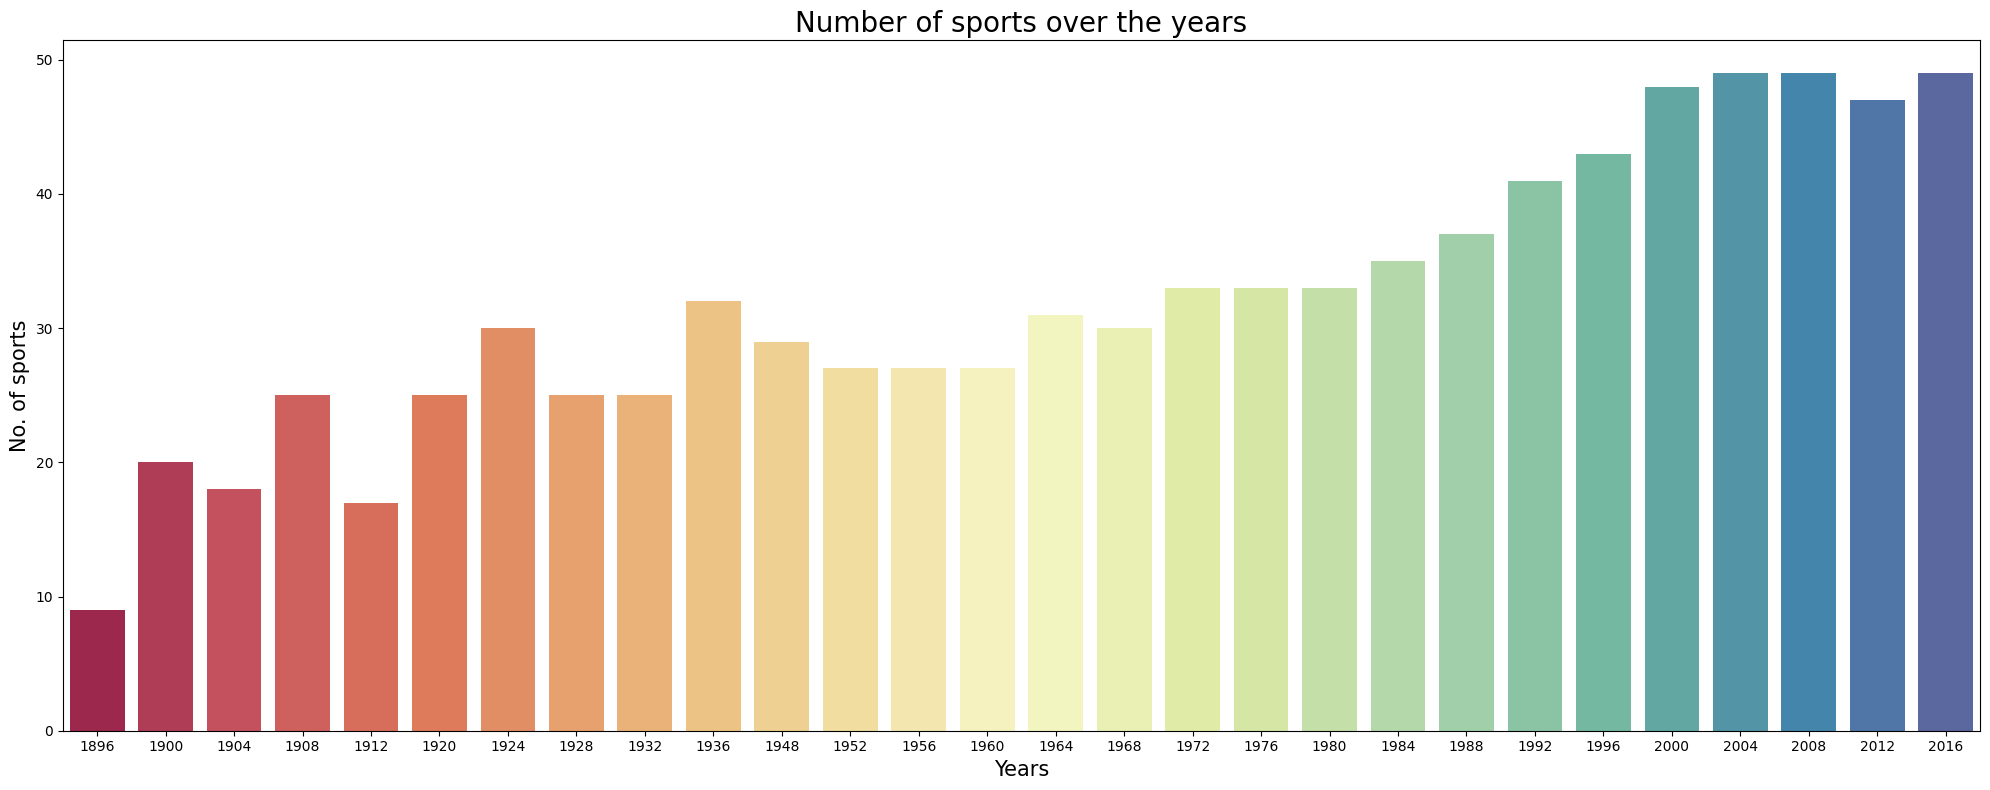

In [11]:
sport_per_year_plot = sns.barplot(data=sports_per_year, x=sports_per_year["Year"], y=sports_per_year["Sport"], palette="Spectral")

#Modificar parametros del grafico para hacerlo mas presentable
sport_per_year_plot.figure.set_figwidth(20)
sport_per_year_plot.figure.set_figheight(8)
sport_per_year_plot.set_title("Number of sports over the years", fontsize=20)
sport_per_year_plot.set_xlabel("Years", fontsize=15)
sport_per_year_plot.set_ylabel("No. of sports", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()

- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo 

##### Filtrar el nombre, año y sexo de cada participante. Se eliminan los atletas que participaron en varios eventos el mismo año.

In [12]:
athlete_per_year_and_sex = olympic_history[["Sex","Year","Name"]].drop_duplicates()

display(athlete_per_year_and_sex)

,Sex,Year,Name
0,M,1992,A Dijiang
1,M,2012,A Lamusi
2,M,1920,Gunnar Nielsen Aaby
3,M,1900,Edgar Lindenau Aabye
4,F,1988,Christine Jacoba Aaftink
...,...,...,...
271110,F,2016,Olga Igorevna Zyuzkova
271111,M,1976,Andrzej ya
271112,M,2016,Piotr ya
271114,M,2000,Tomasz Ireneusz ya


##### Agrupar por sexo y año. Usando "count()" para obtener el numero de participantes.

In [13]:
athlete_per_year_and_sex_grouped = athlete_per_year_and_sex.groupby(["Sex","Year"], as_index=False).count()
athlete_per_year_and_sex_grouped.rename(columns={"Name":"Athletes"}, inplace=True)

athlete_per_year_and_sex_grouped.sample(5)

,Sex,Year,Athletes
32,M,1920,2597
10,F,1952,629
54,M,2016,7784
37,M,1948,4545
15,F,1972,1266


##### Crear grafico de barras con seaborn

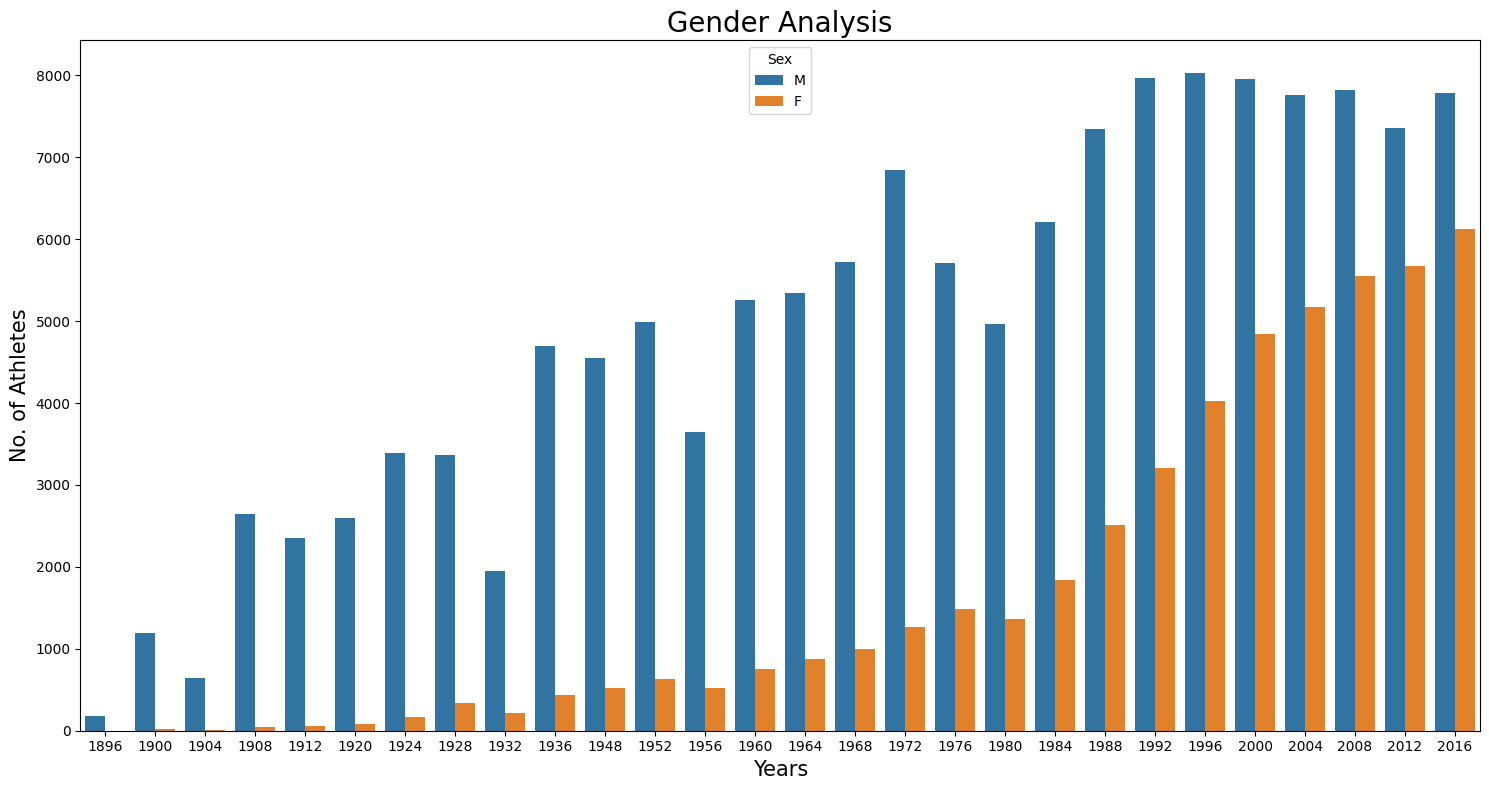

In [14]:
athlete_per_year_and_sex_plot = sns.barplot(data=athlete_per_year_and_sex_grouped, 
                                            x="Year", 
                                            y="Athletes",
                                            hue="Sex", 
                                            hue_order = ['M', 'F']
                                           )

#Modificar parametros del grafico para hacerlo mas presentable
athlete_per_year_and_sex_plot.figure.set_figwidth(15)
athlete_per_year_and_sex_plot.figure.set_figheight(8)
athlete_per_year_and_sex_plot.set_title("Gender Analysis", fontsize=20)
athlete_per_year_and_sex_plot.set_xlabel("Years", fontsize=15)
athlete_per_year_and_sex_plot.set_ylabel("No. of Athletes", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()

- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais

##### Guardar codigos NOC en Dataframe

In [15]:
noc_route = os.path.join("res","120_years_olympic_history","noc_regions.csv")

noc = pd.read_csv(noc_route, engine="python", header=0)

noc.sample(5)


,NOC,region,notes
194,SWZ,Swaziland,NaN
51,CRT,Greece,Crete
88,HKG,China,Hong Kong
219,VEN,Venezuela,NaN
44,COD,Democratic Republic of the Congo,NaN


##### Unir los DataFrame de noc y olympic history
##### Se eliminan la columna NOC y notes para que quede el dataframe solo con el nombre del pais y las medallas.

In [16]:
medal_countries = olympic_history[["NOC", "Medal"]].merge(noc, on=["NOC"], how="left").drop(["NOC", "notes"], axis=1)
medal_countries.rename(columns={"region":"Country"}, inplace=True)
medal_countries.sample(5)

,Medal,Country
266571,NaN,South Korea
209788,NaN,UK
250357,NaN,Romania
4864,NaN,Germany
21006,NaN,Netherlands


##### Agrupar por nombre de Pais y sortear de mayor a menor el conteo de las medallas.

In [17]:
medal_countries_grouped = medal_countries.groupby("Country").count().reset_index().sort_values(by=["Medal"],ascending=False)

medal_countries_grouped.head(5)

,Country,Medal
191,USA,5637
151,Russia,3947
67,Germany,3756
190,UK,2068
63,France,1777


##### Usar slicing para obtener los 50 paises con mas medallas

In [18]:
top_50 = medal_countries_grouped[:50].reset_index(drop=True)

display(top_50)

,Country,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


##### Crear grafico de barras

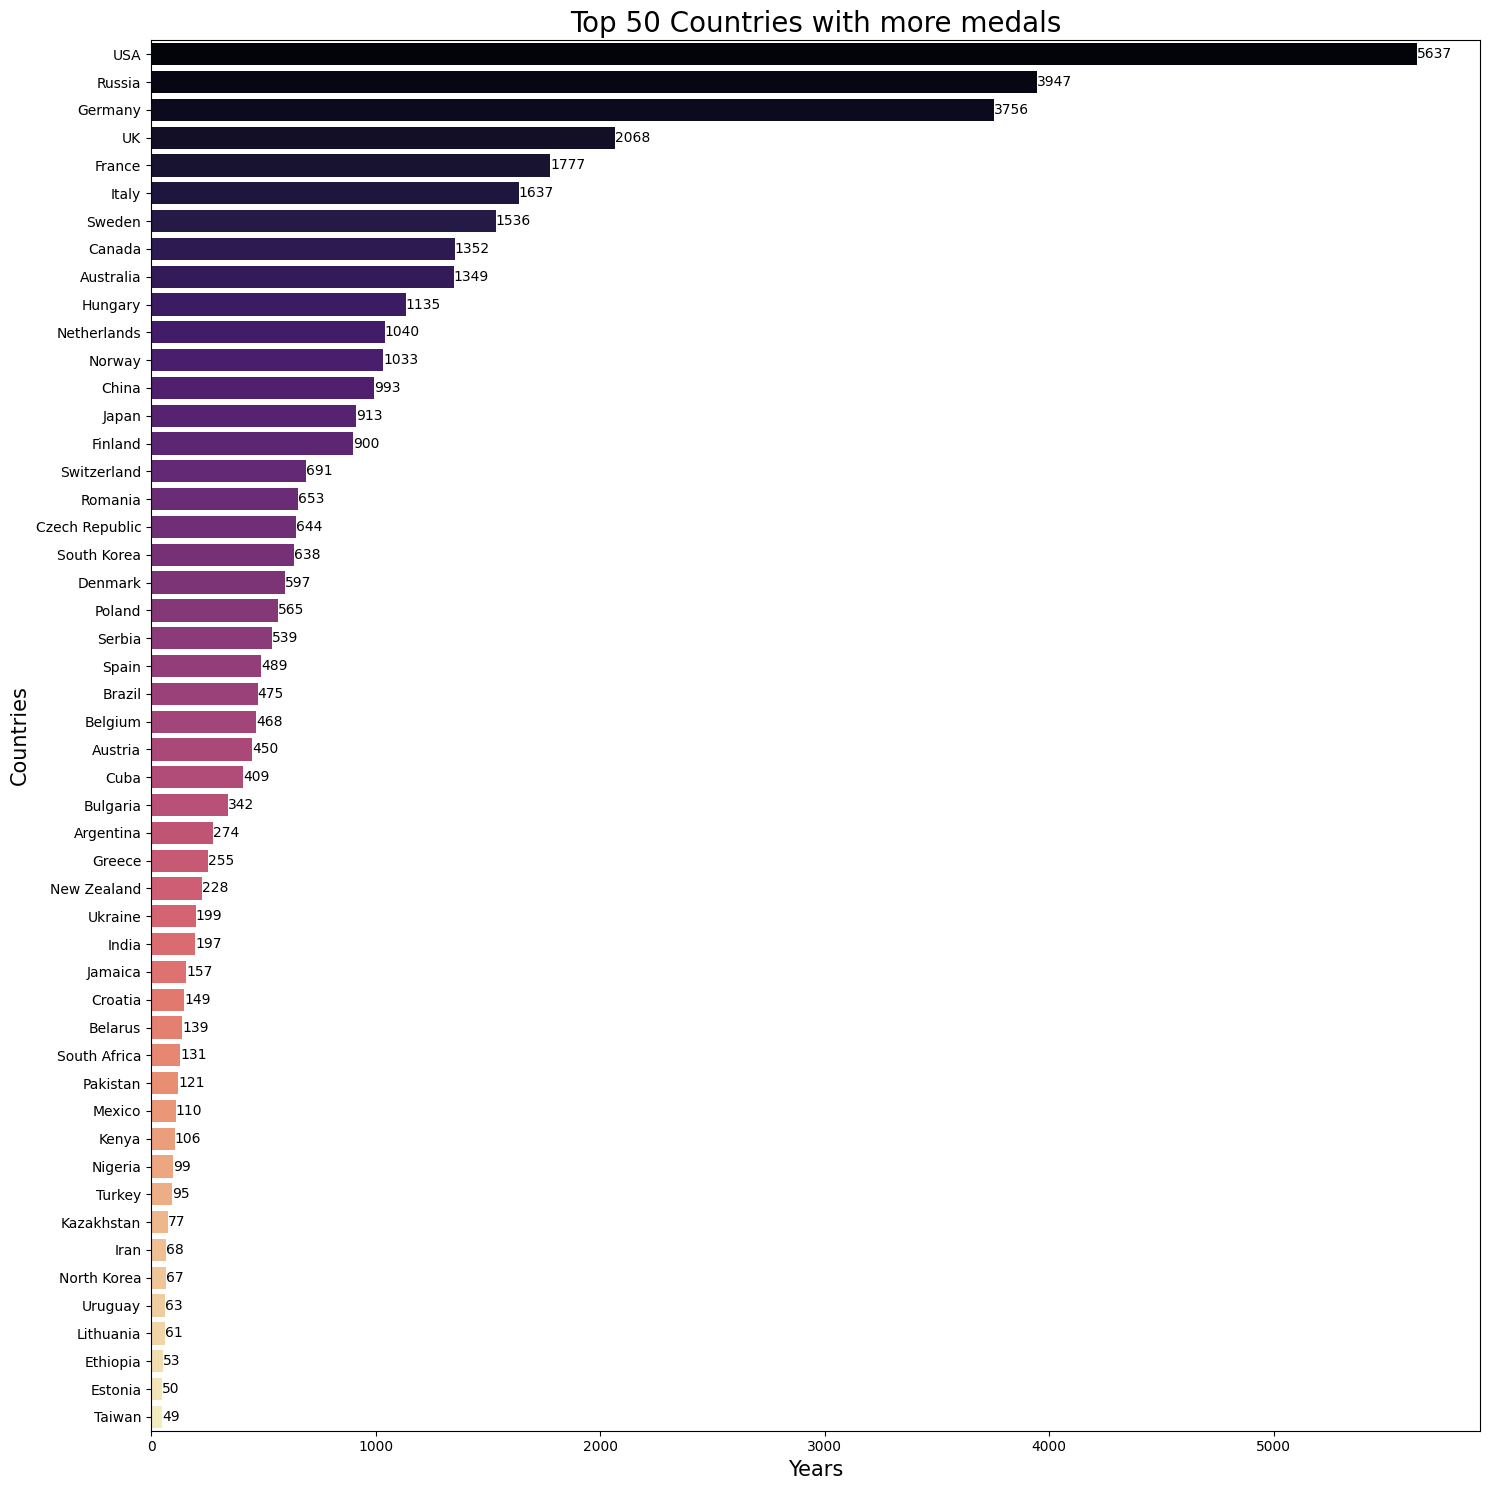

In [19]:
top_50_plot = sns.barplot(data=top_50, 
                          x="Medal", 
                          y="Country",
                          orient="h",
                          palette="magma"
                          )

#Modificar parametros del grafico para hacerlo mas presentable
top_50_plot.figure.set_figwidth(15)
top_50_plot.figure.set_figheight(15)
top_50_plot.set_title("Top 50 Countries with more medals", fontsize=20)
top_50_plot.set_xlabel("Years", fontsize=15)
top_50_plot.set_ylabel("Countries", fontsize=15)
top_50_plot.bar_label(top_50_plot.containers[0])
plt.tight_layout()

#Mostrar grafico
plt.show()

### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

### Preparar los datos para el modelo.

##### Para obtener la edad, sexo, peso, altura y el tiempo de los atletas se deben unir los dos dataframe olympic_history que contiene los datos del atleta y olympic_track_field que contiene el tiempo que hizo cada uno.

##### Se filtran de los dos dataset olympic_track_field y olympic_history los participantes de 100 metros lisos
##### Para obtener los filtros con los que filtrar cada dataset, busque a mano como estaban escrito en cada uno

In [20]:
athletes_100_meters= olympic_history[(olympic_history["Event"] =="Athletics Men's 100 metres") | 
                                     (olympic_history["Event"] =="Athletics Women's 100 metres")].reset_index(drop=True)
 
results_100_meters = olympic_track_field[(olympic_track_field["Event"] == "100M Men") | 
                                         (olympic_track_field["Event"] == "100M Women")].reset_index(drop=True)

In [21]:
athletes_100_meters.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,96,Carlos Rodolfo Abaunza Balladares,M,18.0,168.0,60.0,Nicaragua,NCA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN
2,104,Gana Abba Kimet,M,26.0,NaN,NaN,Chad,CHA,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN
3,129,Ruslan Abbasov,M,22.0,181.0,74.0,Azerbaijan,AZE,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN
4,168,Younis Abdallah Rabee,M,23.0,169.0,68.0,Kuwait,KUW,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN


In [22]:
results_100_meters.head(5)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81
1,M,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89
2,M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91
3,M,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69
4,M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89


##### Solo tenemos el tiempo de los ganadores de medalla, asi que se eliminan los participantes que no tienen medalla en athletes_100_meters

In [23]:
athletes_100_meters = athletes_100_meters[athletes_100_meters["Medal"].notnull()].reset_index(drop=True)

athletes_100_meters.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold
1,5547,Evelyn Ashford (-Washington),F,27.0,165.0,52.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Gold
2,5547,Evelyn Ashford (-Washington),F,31.0,165.0,52.0,United States,USA,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres,Silver
3,5930,Ingrid Auerswald-Lange (Brestrich-),F,22.0,168.0,58.0,East Germany,GDR,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 100 metres,Bronze
4,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold


##### Se eliminan las columnas que no se van a usar de cada dataset

In [24]:
athletes_100_meters = athletes_100_meters.drop(columns=["ID","Name","Team","NOC","Games","Season","City","Sport","Event"])

results_100_meters = results_100_meters.drop(columns=["Event","Location","Name","Nationality"])

In [25]:
athletes_100_meters.head()

,Sex,Age,Height,Weight,Year,Medal
0,M,24.0,183.0,75.0,1924,Gold
1,F,27.0,165.0,52.0,1984,Gold
2,F,31.0,165.0,52.0,1988,Silver
3,F,22.0,168.0,58.0,1980,Bronze
4,M,28.0,183.0,82.0,1996,Gold


In [26]:
results_100_meters.head()

,Gender,Year,Medal,Result
0,M,2016,G,9.81
1,M,2016,S,9.89
2,M,2016,B,9.91
3,M,2008,G,9.69
4,M,2008,S,9.89


##### Reemplazar los nombres de las medallas y los valores de Gender para que coincidan en los dos dataset

In [27]:
athletes_100_meters = athletes_100_meters.replace({"Medal":{"Gold":"G", "Silver":"S", "Bronze":"B"}})

results_100_meters["Gender"] = results_100_meters["Gender"].replace(["W"], "F")

In [28]:
athletes_100_meters.sample(3)

,Sex,Age,Height,Weight,Year,Medal
71,M,24.0,178.0,77.0,1920,S
113,F,25.0,167.0,53.0,1976,G
25,M,28.0,189.0,94.0,1988,S


In [29]:
results_100_meters.sample(3)

,Gender,Year,Medal,Result
124,F,1980,G,11.06
34,M,1920,S,10.8
5,M,2008,B,9.91


##### Unir los dos dataset usando las columnas de Year, Sex/Gender y Medal 

In [30]:
model_data = athletes_100_meters.merge(results_100_meters, left_on=["Sex", "Year", "Medal"], right_on=["Gender", "Year", "Medal"], how="left")

model_data

,Sex,Age,Height,Weight,Year,Medal,Gender,Result
0,M,24.0,183.0,75.0,1924,G,M,10.6
1,F,27.0,165.0,52.0,1984,G,F,10.97
2,F,31.0,165.0,52.0,1988,S,NaN,NaN
3,F,22.0,168.0,58.0,1980,B,F,11.14
4,M,28.0,183.0,82.0,1996,G,M,9.84
...,...,...,...,...,...,...,...,...
152,F,25.0,174.0,60.0,1936,S,F,11.7
153,M,19.0,170.0,61.0,1908,G,M,10.8
154,M,28.0,183.0,86.0,1980,G,M,10.25
155,F,20.0,160.0,67.0,2004,S,F,10.96


##### Eliminar Year, Medal ya que las dos primeras no se usaran en el modelo y Gender ya que es redundante con la columna Sex

In [31]:
model_data = model_data.drop(["Year", "Medal", "Gender"], axis=1)

model_data

,Sex,Age,Height,Weight,Result
0,M,24.0,183.0,75.0,10.6
1,F,27.0,165.0,52.0,10.97
2,F,31.0,165.0,52.0,NaN
3,F,22.0,168.0,58.0,11.14
4,M,28.0,183.0,82.0,9.84
...,...,...,...,...,...
152,F,25.0,174.0,60.0,11.7
153,M,19.0,170.0,61.0,10.8
154,M,28.0,183.0,86.0,10.25
155,F,20.0,160.0,67.0,10.96


##### Verificar que datos nos quedan

In [32]:
#Todavia quedan datos faltantes
model_data.isnull().sum()

Sex       0
Age       0
Height    5
Weight    5
Result    6
dtype: int64

##### Eliminar las filas con datos incompletos

In [33]:
model_data = model_data.dropna()

model_data

,Sex,Age,Height,Weight,Result
0,M,24.0,183.0,75.0,10.6
1,F,27.0,165.0,52.0,10.97
3,F,22.0,168.0,58.0,11.14
4,M,28.0,183.0,82.0,9.84
5,M,31.0,180.0,65.0,10.4
...,...,...,...,...,...
152,F,25.0,174.0,60.0,11.7
153,M,19.0,170.0,61.0,10.8
154,M,28.0,183.0,86.0,10.25
155,F,20.0,160.0,67.0,10.96


##### Cambiar los valores de Sex a numeros. 0 para Hombre y 1 para Mujer

In [34]:
model_data.replace({"Sex":{"M":0, "F":1}}, inplace=True)

model_data

C:\Users\N29\AppData\Local\Temp\ipykernel_4212\2940118181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.replace({"Sex":{"M":0, "F":1}}, inplace=True)


,Sex,Age,Height,Weight,Result
0,0,24.0,183.0,75.0,10.6
1,1,27.0,165.0,52.0,10.97
3,1,22.0,168.0,58.0,11.14
4,0,28.0,183.0,82.0,9.84
5,0,31.0,180.0,65.0,10.4
...,...,...,...,...,...
152,1,25.0,174.0,60.0,11.7
153,0,19.0,170.0,61.0,10.8
154,0,28.0,183.0,86.0,10.25
155,1,20.0,160.0,67.0,10.96


##### Cambiar el tipo de results a float64

In [35]:
model_data.dtypes

Sex         int64
Age       float64
Height    float64
Weight    float64
Result     object
dtype: object

In [36]:
#Hay un resultado que tenemos en None, para reemplazarlo primero lo cambio a NaN
model_data["Result"].unique()

array(['10.6', '10.97', '11.14', '9.84', '10.4', '10.5', '9.75', '11.9',
       '9.9', '9.99', '9.69', '9.63', '9.81', '10.14', '10.83', '11.23',
       '11.13', '12.0', '10.81', '11.2', '11.24', '9.96', '10.8', '10.06',
       '11.5', '9.91', '10.82', '10.94', '10.3', '11.1', '10.2', '10.78',
       '10.75', '10.86', '10.02', '9.89', '9.85', '9.79', '10.19', '10.0',
       '9.87', '11.0', '11.17', '12.2', '11.3', '10.22', 'None', '11.6',
       '11.06', '10.9', '12.6', '11.12', '11.18', '10.25', '11.7',
       '10.33', '10.04', '10.93', '9.86', '11.07', '11.16', '11.19',
       '10.39', '10.84', '10.08', '11.08', '11.8', '10.7', '10.98',
       '10.24', '10.71', '10.96', '11.4'], dtype=object)

In [37]:
model_data["Result"].replace(to_replace=["None"], value=np.nan, inplace=True)

model_data["Result"].unique()

C:\Users\N29\AppData\Local\Temp\ipykernel_4212\2536132562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Result"].replace(to_replace=["None"], value=np.nan, inplace=True)


array(['10.6', '10.97', '11.14', '9.84', '10.4', '10.5', '9.75', '11.9',
       '9.9', '9.99', '9.69', '9.63', '9.81', '10.14', '10.83', '11.23',
       '11.13', '12.0', '10.81', '11.2', '11.24', '9.96', '10.8', '10.06',
       '11.5', '9.91', '10.82', '10.94', '10.3', '11.1', '10.2', '10.78',
       '10.75', '10.86', '10.02', '9.89', '9.85', '9.79', '10.19', '10.0',
       '9.87', '11.0', '11.17', '12.2', '11.3', '10.22', nan, '11.6',
       '11.06', '10.9', '12.6', '11.12', '11.18', '10.25', '11.7',
       '10.33', '10.04', '10.93', '9.86', '11.07', '11.16', '11.19',
       '10.39', '10.84', '10.08', '11.08', '11.8', '10.7', '10.98',
       '10.24', '10.71', '10.96', '11.4'], dtype=object)

In [38]:
#Cambiar el tipo de dato guardado en Result a float
model_data["Result"] = model_data["Result"].astype("float64")

C:\Users\N29\AppData\Local\Temp\ipykernel_4212\2752049949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Result"] = model_data["Result"].astype("float64")


In [39]:
model_data["Result"].unique()

array([10.6 , 10.97, 11.14,  9.84, 10.4 , 10.5 ,  9.75, 11.9 ,  9.9 ,
        9.99,  9.69,  9.63,  9.81, 10.14, 10.83, 11.23, 11.13, 12.  ,
       10.81, 11.2 , 11.24,  9.96, 10.8 , 10.06, 11.5 ,  9.91, 10.82,
       10.94, 10.3 , 11.1 , 10.2 , 10.78, 10.75, 10.86, 10.02,  9.89,
        9.85,  9.79, 10.19, 10.  ,  9.87, 11.  , 11.17, 12.2 , 11.3 ,
       10.22,   nan, 11.6 , 11.06, 10.9 , 12.6 , 11.12, 11.18, 10.25,
       11.7 , 10.33, 10.04, 10.93,  9.86, 11.07, 11.16, 11.19, 10.39,
       10.84, 10.08, 11.08, 11.8 , 10.7 , 10.98, 10.24, 10.71, 10.96,
       11.4 ])

##### De los resultados nos esta faltanto un dato, al ser poca la cantidad decidi reemplazar el NaN por el promedio de todos los resultados

In [40]:
model_data["Result"].mean().round(2)

model_data["Result"].fillna(model_data["Result"].mean().round(2), inplace=True)

model_data["Result"].unique()

C:\Users\N29\AppData\Local\Temp\ipykernel_4212\212870734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Result"].fillna(model_data["Result"].mean().round(2), inplace=True)


array([10.6 , 10.97, 11.14,  9.84, 10.4 , 10.5 ,  9.75, 11.9 ,  9.9 ,
        9.99,  9.69,  9.63,  9.81, 10.14, 10.83, 11.23, 11.13, 12.  ,
       10.81, 11.2 , 11.24,  9.96, 10.8 , 10.06, 11.5 ,  9.91, 10.82,
       10.94, 10.3 , 11.1 , 10.2 , 10.78, 10.75, 10.86, 10.02,  9.89,
        9.85,  9.79, 10.19, 10.  ,  9.87, 11.  , 11.17, 12.2 , 11.3 ,
       10.22, 11.6 , 11.06, 10.9 , 12.6 , 11.12, 11.18, 10.25, 11.7 ,
       10.33, 10.04, 10.93,  9.86, 11.07, 11.16, 11.19, 10.39, 10.84,
       10.08, 11.08, 11.8 , 10.7 , 10.98, 10.24, 10.71, 10.96, 11.4 ])

##### Asi quedaria entonces los datos finales para realizar el modelo predictivo

In [41]:
model_data

,Sex,Age,Height,Weight,Result
0,0,24.0,183.0,75.0,10.60
1,1,27.0,165.0,52.0,10.97
3,1,22.0,168.0,58.0,11.14
4,0,28.0,183.0,82.0,9.84
5,0,31.0,180.0,65.0,10.40
...,...,...,...,...,...
152,1,25.0,174.0,60.0,11.70
153,0,19.0,170.0,61.0,10.80
154,0,28.0,183.0,86.0,10.25
155,1,20.0,160.0,67.0,10.96


### Realizar modelo predictivo con el model_data

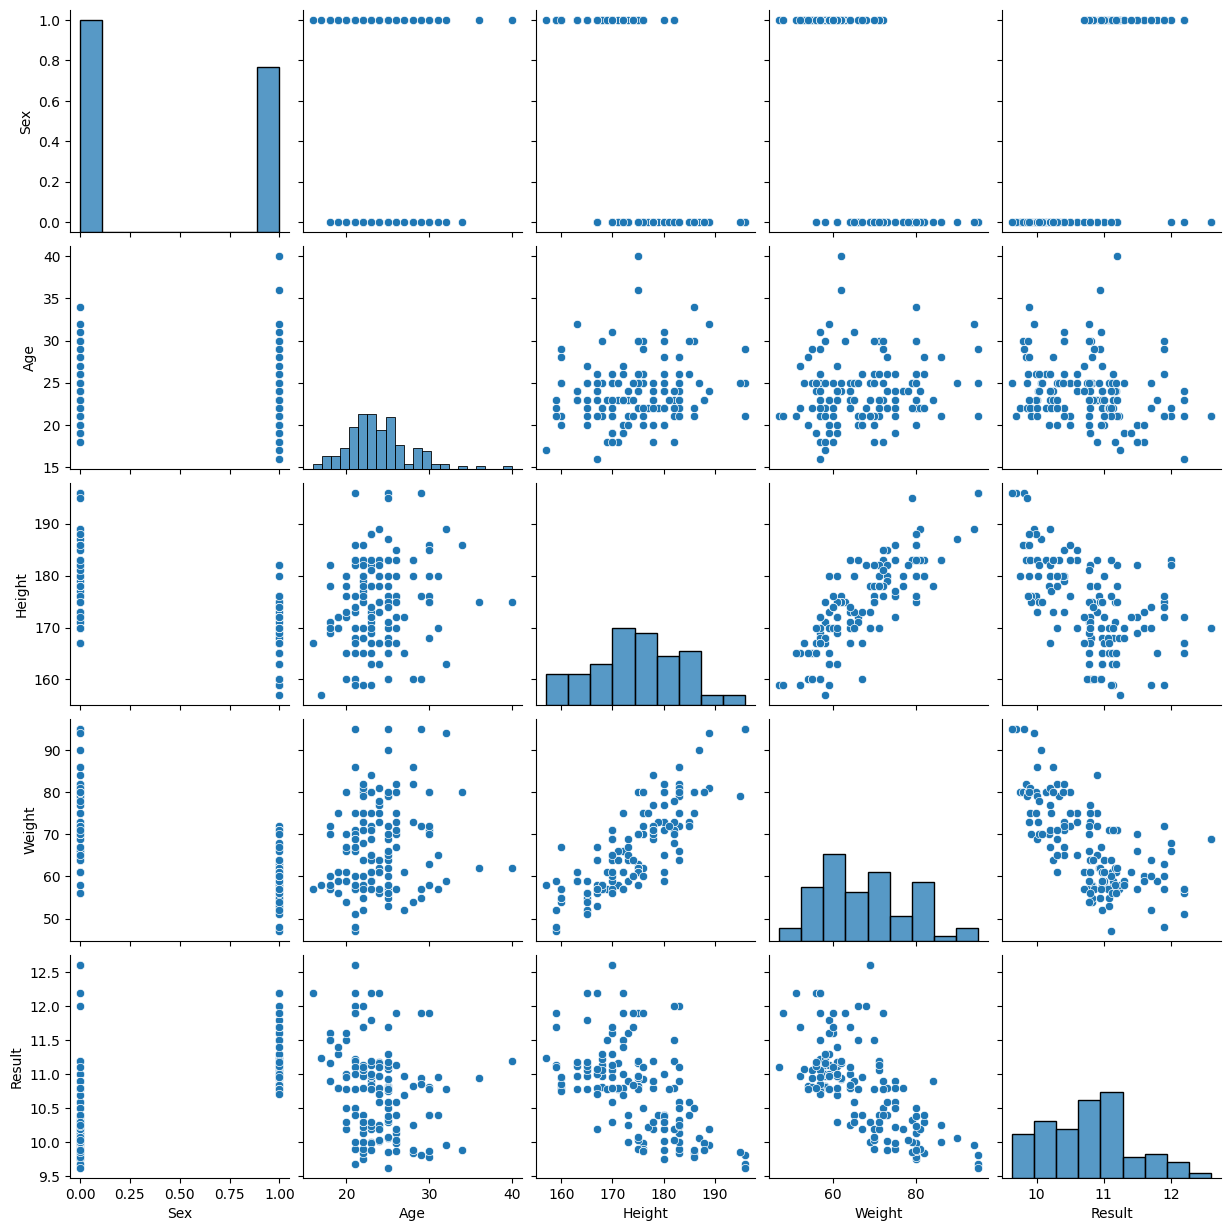

In [42]:
#Scatterplot con la relacion de todas las variables.

sns.pairplot(data=model_data)

##### Preparar X y Y del modelo a partir del dataframe model_data

In [43]:
X = model_data[["Sex", "Age", "Height", "Weight"]]

X.head()


,Sex,Age,Height,Weight
0,0,24.0,183.0,75.0
1,1,27.0,165.0,52.0
3,1,22.0,168.0,58.0
4,0,28.0,183.0,82.0
5,0,31.0,180.0,65.0


In [44]:
y = model_data["Result"]

y.head()

0    10.60
1    10.97
3    11.14
4     9.84
5    10.40
Name: Result, dtype: float64

##### Chequear shape de X y Y

In [47]:
print(X.shape,y.shape)

(146, 4) (146,)


##### Importar modulos de sklearn para realizar el modelo predictivo

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

##### Separar los datos en sets de train y test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=811)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109, 4)
(109,)
(37, 4)
(37,)


#### Entrenar modelo Regresion lineal de Sklearn

In [50]:
athlete_model = LinearRegression()
athlete_model.fit(X_train,y_train)

LinearRegression()

##### Verificar varianza con respecto a valores de testeo

In [51]:
y_pred = athlete_model.predict(X_test)

print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MRE: {metrics.mean_squared_error(y_test, y_pred, squared=True)}")
print(f"SMRE: {metrics.mean_squared_error(y_test, y_pred, squared=False)}")

MAE: 0.3199588111293146
MRE: 0.15891224583738967
SMRE: 0.3986379884524174


![model](res/model.png)

##### Manejar input de usuario para predecir el tiempo del atleta

In [120]:
age = float(input("Introduce la edad \n"))
sex = float(input("Introduce el sexo (0: Hombre, 1: Mujer) \n"))
weight = float(input("Intrdouce el peso (kg) \n"))
height = float(input("Introduce la altura (cm) \n"))

athlete = pd.DataFrame({"Sex":[sex], "Age":[age], "Height":[height], "Weight":[weight]})

time = athlete_model.predict(athlete)
print(f"Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: {time[0]}")

Introduce la edad 
 19
Introduce el sexo (0: Hombre, 1: Mujer) 
 0
Intrdouce el peso (kg) 
 68
Introduce la altura (cm) 
 181


Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: 10.849328258898128



##### Pienso que el modelo es un poco limitado ya que se tienen solo los resultados de los ganadores de medalla y no de todos los participantes de la olimpiada lo que hace menos general el modelo

#### Realizar modelo con Tensorflow

In [53]:
#No es necesario pero quise practicar y ver la diferencia entre los dos modelos.
#Asi tambien me corrige el uso de Tensorflow ^^u

##### Importar modulos para red neuronal Sequencial

In [100]:
from numpy import set_printoptions
from numpy import sqrt
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

##### Definir el numero de features

In [101]:
n_features = X_train.shape[1]

n_features

4

##### Definir y compilar modelo

In [133]:
athlete_model_tf = Sequential()
athlete_model_tf.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
athlete_model_tf.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
athlete_model_tf.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
athlete_model_tf.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
athlete_model_tf.add(Dense(1))

#Compilar
athlete_model_tf.compile(optimizer="adam", loss="mse")

##### Configurar Early Stopping

In [134]:
es = EarlyStopping(monitor='loss', patience=5)

##### Entrenar modelo 

In [135]:
athlete_model_tf.fit(X_train, y_train, epochs=3000, batch_size=32, verbose=0, callbacks=[es])

##### Evaluar el modelo con los datos de entrenamiento

In [136]:
error = athlete_model_tf.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

MSE: 0.942, RMSE: 0.970


In [137]:
#Como podria mejorar el modelo para que haga mejores predicciones?

##### Manejar input para hacer predicciones

In [127]:
age = float(input("Introduce la edad \n"))
sex = float(input("Introduce el sexo (0: Hombre, 1: Mujer) \n"))
weight = float(input("Intrdouce el peso (kg) \n"))
height = float(input("Introduce la altura (cm) \n"))

athlete = [sex, age, height, weight]

time = athlete_model_tf.predict([athlete])

print(f"Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: {time[0]}")

Introduce la edad 
 28
Introduce el sexo (0: Hombre, 1: Mujer) 
 1
Intrdouce el peso (kg) 
 16
Introduce la altura (cm) 
 150


1/1 [==============================] - 0s 85ms/step
Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: [1.374]


## Comparar resultado de los dos modelos

![model](res/model.png)

In [138]:
age = float(input("Introduce la edad \n"))
sex = float(input("Introduce el sexo (0: Hombre, 1: Mujer) \n"))
weight = float(input("Intrdouce el peso (kg) \n"))
height = float(input("Introduce la altura (cm) \n"))

athlete = pd.DataFrame({"Sex":[sex], "Age":[age], "Height":[height], "Weight":[weight]})
athlete_tf = [sex, age, height, weight]

#Modelo Sklearn
time = athlete_model.predict(athlete)
print("Modelo Sklearn")
print(f"Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: {time[0]:.2f} \n")

#Modelo Tensorflow
time = athlete_model_tf.predict([athlete])
#set_printoptions(precision=3)
print("Modelo Tensorflow")
print(f"Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: {time[0][0]:.2f}")

Introduce la edad 
 19
Introduce el sexo (0: Hombre, 1: Mujer) 
 0
Intrdouce el peso (kg) 
 68
Introduce la altura (cm) 
 181


Modelo Sklearn
Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: 10.85 

1/1 [==============================] - 0s 75ms/step
Modelo Tensorflow
Segun el modelo escogido el atleta con los datos introducidos hará el siguiente tiempo: 10.67
